In [1]:
# System Modules
import matplotlib.pyplot as plt
# Deep Learning Modules
from torch.utils.data import Dataset

# User Defined Modules
from data.Img_dataset import *
from models import UNet

# from utils.augmentation import *
from serde import read_config,open_experiment,create_experiment, delete_experiment
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

## Dataset Inspector
The goal of this notebook is to check that the dataset created by **Img_dataset.py** is correct.<br>
In particular, the Labels saved by the simulator in the so called Point-Cloud should match the true road lanes.

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cfg_path='./config.json'
params=read_config(cfg_path)

In [4]:
# Creating an experiment to check the performance of the Simulator and the Img_dataset class.
delete_experiment('InspectSet6')
params=create_experiment('InspectSet6')

In [5]:
params=open_experiment('InspectSet6')  
cfg_path=params['cfg_path']

# Creating the dataset with the desired parameters (a small batch size is enough).
inspect_dataset =  Img_dataset( dataset_name='InspectSet6', size=8, cfg_path=cfg_path)

inspect_loader = torch.utils.data.DataLoader(dataset=inspect_dataset,
                                              batch_size=1,
                                              shuffle=False, num_workers=4)

Exception NameError: "global name 'FileNotFoundError' is not defined" in <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f4489937a10>> ignored


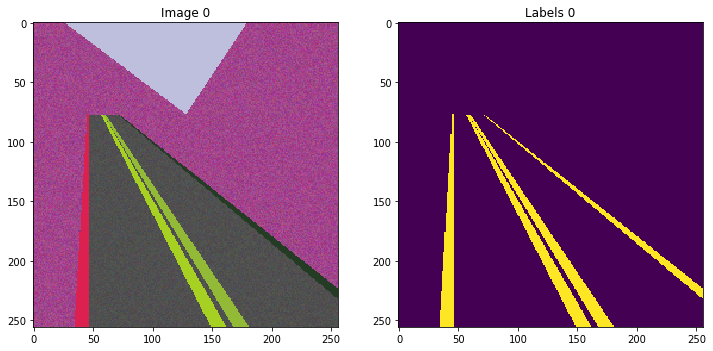

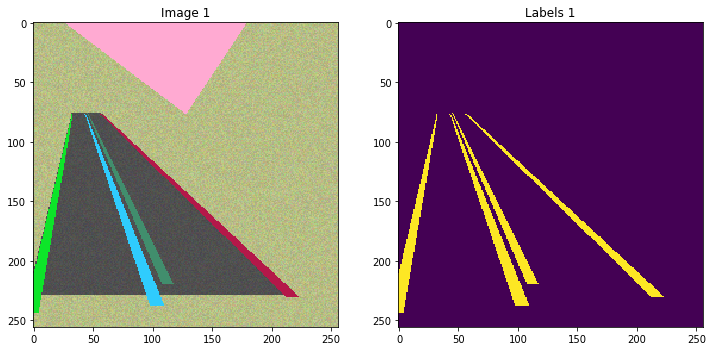

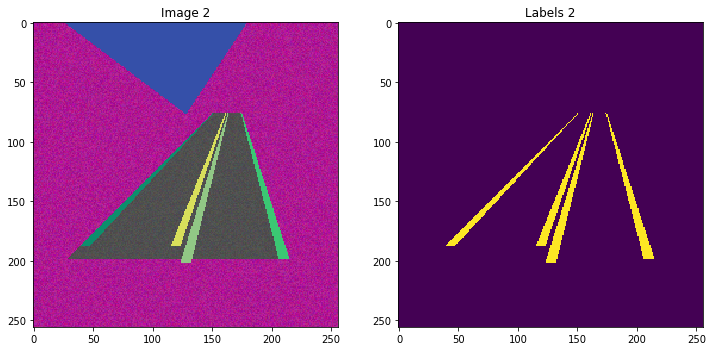

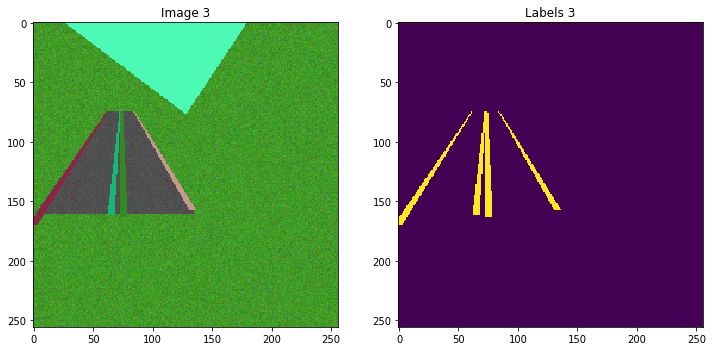

In [6]:
# Iterating the dataset and displaying the image and the labels. 
# Check visually that the labels correspond to the true road lanes.
for i, (image, label) in enumerate( inspect_loader ):
    
    
    image = image.to(device)
    label = label.to(device)
    image = image.byte().cpu().numpy()
    label = label.cpu().numpy()
    image = image[0]
    label = label[0]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
    ax1.imshow(image.transpose(1, 2, 0))
    ax1.set_title("Image " + str(i))
    ax2.imshow(label)
    ax2.set_title("Labels " + str(i))

    if(i>=3):
        break
    
plt.show()